In [13]:
import pandas as pd  # import the necessary libraries
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

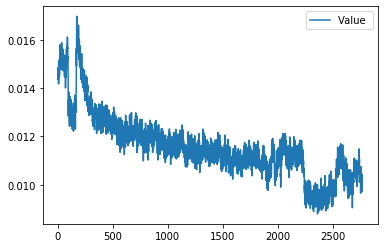

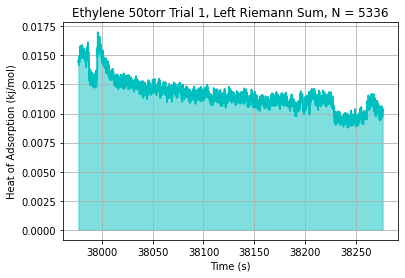

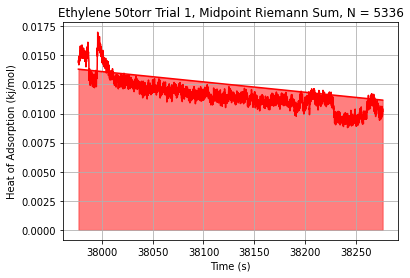

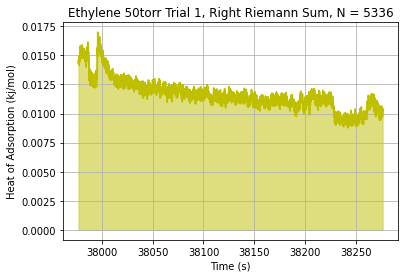

Left Riemann Sum:  0.17599517913204843
Midpoint Riemann Sum:  0.1759919262268967
Right Riemann Sum:  0.17598867332174492


In [14]:
# paste path of folder and open
path = r'C:\Users\Margaret\Desktop\heat of adsorption\csvfiles'
dirs = os.listdir(path)

try:
    for file in dirs: # for each file in this path/directory
        with open(os.path.join(path, file)) as myfile: #open file
            df = pd.read_csv(myfile, usecols=[0,1], delimiter=',') #print the first 2 columns
            df.plot() # plot the data to glean initial insights and understanding
            df = df.iloc[1:] # remove the first row containing the names of the column
            df = df.iloc[:-100] # drop the last 100 rows of data
            df.columns = ['Time','Value'] # name the columns to make it easier to work with
            df['Value'] = df['Value'].astype(float, copy=True, errors='raise') # convert data in value to float
            len_df_time = len(df['Time']) # store length of time dataframe      

            df_time = [] # declare list
            df_time = df.Time.to_string(index=False) # convert df to string
            df_time = re.split(':|\n', df_time) # split the str list by : and \n
            df_time = list(map(int, df_time)) # converts from str list to int list

            # converts the time values from hours/minutes/millisecs into seconds
            df_time[0::4] = [x*3600 for x in df_time[0::4]] # hrs to secs
            df_time[1::4] = [x*60 for x in df_time[1::4]] # min to secs
            df_time[3::4] = [x/1000 for x in df_time[3::4]] # milli to secs

            # convert list to array and then reshape array to add up the converted numbers 
            arr_time = np.array(df_time, dtype=float) # convert to numpy array
            arr_time = arr_time.reshape(len_df_time, 4)  # reshape array
            arr_time_final = np.sum(arr_time, axis=1) # sum every row into new array
            
            df['Time'] = pd.DataFrame(data=arr_time_final, columns=['Time'])
            #print(df) # check to see if data was copied correctly

            # area calculations using riemann sum to get 3 estimates to compare with theoretical value
            # this specific section of the code on doing riemann sum is courtesy of UBC math (however 
            # there are some edits I made that are specific to thus project)
            # https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/
            # everything else is in the code is mine

            #left riemann sum graph
            N = 2*len_df_time # num of rectangles to use, higher rectangles = better estimates
            plt.figure(0) # allows for each graph to be on a separate plot
            plt.plot(df['Time'],df['Value'],'c')
            xL = df['Time'][:-1] # begins with the leftmost points and does not include the last point
            yL = df['Value'][:-1]
            plt.plot(xL,yL,'c')
            plt.fill_between( xL, yL, color="c", alpha=0.5)
            plt.title('Ethylene 50torr Trial 1, Left Riemann Sum, N = {}'.format(N))
            plt.xlabel('Time (s)')
            plt.ylabel('Heat of Adsorption (kj/mol)')
            plt.grid()
            plt.show()
        
            # midpoint riemann sum graph
            # slope intercept function used for midpoint riemann sum. It is not 
            # necessary to start at the very end because in several different csv files, 
            # the data at the end does not experimentally count
            y2 = df['Value'].iloc[-100] # starting from the end and back 100 points. 
            y1 = df['Value'].iloc[100] # starting from the front and going forward 100 points
            x2 = df['Time'].iloc[-100]
            x1 = df['Time'].iloc[100]
            m = (y2 - y1) / (x2 - x1) # slope
            y_int =  y1 - m*x1 # y intercept
            f = lambda x : m*x + y_int # slope intercept function

            plt.figure(1)
            plt.plot(df['Time'],df['Value'],'r')
            xM = (df['Time'][:-1] + df['Time'][1:])/2 # takes mid of left and right point
            yM = f(xM) # passes point to slope intercept function
            plt.plot(xM,yM,'r')
            plt.fill_between( xM, yM, color="r", alpha=0.5)
            plt.title('Ethylene 50torr Trial 1, Midpoint Riemann Sum, N = {}'.format(N))
            plt.xlabel('Time (s)')
            plt.ylabel('Heat of Adsorption (kj/mol)')
            plt.grid()
            plt.show()
                
            # right riemann sum graph
            plt.figure(2)
            plt.plot(df['Time'],df['Value'],'y')
            xR = df['Time'][1:] # excludes first point but includes the last point
            yR = df['Value'][1:]
            plt.plot(xR,yR,'y')
            plt.fill_between( xR, yR, color="y", alpha=0.5)
            plt.title('Ethylene 50torr Trial 1, Right Riemann Sum, N = {}'.format(N))
            plt.xlabel('Time (s)')
            plt.ylabel('Heat of Adsorption (kj/mol)')
            plt.grid()
            plt.show()

            # area calculations
            a = df['Time'].iloc[100]
            b = df['Time'].iloc[-100]
            dx = (b-a)/N
            r_p = a+dx # right point starts at a + change in dela
            m_p = (a+r_p)/2 # mid poitn starts at (left+right)/2
            left_riemann = np.linspace(a,b-dx,N)
            midpoint_riemann = np.linspace(m_p,b - dx/2,N)
            right_riemann = np.linspace(r_p,b,N)   
            #print(left_riemann) # used as sanity check
            #print(midpoint_riemann)
            #print(right_riemann)
            left_riemann_sum = np.sum(f(left_riemann) * dx)
            midpoint_riemann_sum = np.sum(f(midpoint_riemann) * dx)
            right_riemann_sum = np.sum(f(right_riemann) * dx)

            #calorimetry constant to multiply with area value to get final answers
            cal_const = 0.050975
            left_riemann_sum = left_riemann_sum*cal_const
            midpoint_riemann_sum = midpoint_riemann_sum*cal_const
            right_riemann_sum = right_riemann_sum*cal_const
            
            print("Left Riemann Sum: ", left_riemann_sum) # print each area estimate
            print("Midpoint Riemann Sum: ", midpoint_riemann_sum)
            print("Right Riemann Sum: ", right_riemann_sum)
            
except:
    print("Unable to open file")
        